### Open all necessary files for collecting vocabularies

In [1]:
import pickle

In [2]:
import pandas as pd

In [3]:
topic_statistics_file = './new_cleaned/topics_all_statistics_and_scores.csv'

In [4]:
topic_statistics = pd.read_csv(topic_statistics_file)

In [5]:
topic_statistics.shape  # there's a threshold on the number of completions

(1318, 22)

In [6]:
topic_statistics.columns

Index(['step_id', 'is_theory', 'text', 'seconds_to_complete',
       'last_3_month_completion_rate',
       'last_3_month_completed_step_users_count', 'last_3_month_avg_like',
       'last_3_month_likes_count', 'last_3_month_topic_completion_rate',
       'last_3_month_completed_topic_users_count',
       'back_to_theory_times_per_user_session_avg_last_3_month',
       'back_to_theory_users_%_last_3_month', 'cleaned_texts', 'num_headings',
       'symbols_in_snippets', 'num_words', 'num_sentences', 'num_syllables',
       'norm_seconds', 'ASL', 'flesch_score', 'dale_chall_score'],
      dtype='object')

In [7]:
topic_statistics.head()

,step_id,is_theory,text,seconds_to_complete,last_3_month_completion_rate,last_3_month_completed_step_users_count,last_3_month_avg_like,last_3_month_likes_count,last_3_month_topic_completion_rate,last_3_month_completed_topic_users_count,...,cleaned_texts,num_headings,symbols_in_snippets,num_words,num_sentences,num_syllables,norm_seconds,ASL,flesch_score,dale_chall_score
0,12357,1,"""<h5 id=\""introduction\""> Introduction</h5>\n\...",603.45,0.56,40.0,2.00,10.0,0.90,35.0,...,""" *heading* So far you have learned quite a lo...",6,790,618,24,995,9.764563,25.750000,44.490012,9.180577
1,12691,1,"""<p>JavaScript was originally developed as a l...",253.21,0.87,884.0,1.72,79.0,0.96,844.0,...,"""JavaScript was originally developed as a lang...",5,35,605,35,962,4.185289,17.285714,54.769008,9.896400
2,8112,1,"""<p>We've already learned what annotations are...",486.94,0.45,50.0,1.57,7.0,0.89,49.0,...,"""We've already learned what annotations are an...",3,1506,610,30,990,7.982623,20.333333,48.895027,9.097296
3,7892,1,"""<h5>Introduction</h5>\n\n<p>You often hear pe...",542.73,0.72,60.0,2.00,5.0,0.91,58.0,...,""" *heading* You often hear people speak about ...",5,0,1079,51,1652,5.029935,21.156863,55.834186,9.207762
4,15809,1,"""<h5>Introduction</h5>\n\n<p>When you have alr...",556.76,0.43,43.0,1.40,10.0,0.91,53.0,...,""" *heading* When you have already learned the ...",5,409,633,21,995,8.795577,30.142857,43.258957,9.721412


In [8]:
topic_statistics = topic_statistics[['step_id', 'cleaned_texts', 'num_words', 'ASL', 'norm_seconds']]

### Preprocess topics' texts and get text statistics

In [9]:
import spacy

In [10]:
#!python3 -m spacy download en_core_web_sm

In [11]:
en_sm_model = spacy.load("en_core_web_sm")

In [12]:
def lemmatize(text):
    doc = en_sm_model(text)
    lemmatized = [i.lemma_ for i in doc]
    return lemmatized

In [13]:
lemmatized_list = []

for i, row in enumerate(topic_statistics.iterrows()):
    if i % 50 == 0:
        print(i)
    text = row[1].cleaned_texts
    try:
        lemmatized = lemmatize(text)
    except:
        print(i, row[1].step_id, text)
        raise

    lemmatized_list.append(' '.join(lemmatized))  # store as string because df converts a list into a string anyway

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300


In [14]:
topic_statistics['lemmatized_texts'] = lemmatized_list

#### Delete punctuation signs from lemmatized texts to improve topic frequency lists

In [15]:
import re

In [16]:
def clean_text(string):
    string = string.replace('\n', '')
    string = re.sub(r'[^\w\s]', '', string)
    return string

In [17]:
lemm_wo_punct = []

for i, row in topic_statistics.iterrows():
    cleaned_text = clean_text(row.lemmatized_texts)
    lemm_wo_punct.append(cleaned_text)
    
topic_statistics['lemm_wo_punct'] = lemm_wo_punct

In [18]:
topic_statistics.head()

,step_id,cleaned_texts,num_words,ASL,norm_seconds,lemmatized_texts,lemm_wo_punct
0,12357,""" *heading* So far you have learned quite a lo...",618,25.750000,9.764563,""" * head * so far you have learn quite a lot a...",head so far you have learn quite a lot abou...
1,12691,"""JavaScript was originally developed as a lang...",605,17.285714,4.185289,""" JavaScript be originally develop as a langua...",JavaScript be originally develop as a languag...
2,8112,"""We've already learned what annotations are an...",610,20.333333,7.982623,""" we 've already learn what annotation be and ...",we ve already learn what annotation be and wh...
3,7892,""" *heading* You often hear people speak about ...",1079,21.156863,5.029935,""" * head * you often hear people speak about t...",head you often hear people speak about the ...
4,15809,""" *heading* When you have already learned the ...",633,30.142857,8.795577,""" * head * when you have already learn the bas...",head when you have already learn the basic ...


In [19]:
topic_statistics.to_csv('./new_cleaned/topics_all_spacy_lemm.csv', index=False)

### Get word frequencies and tf-idfs for each topic

In [23]:
import pandas as pd

In [24]:
import pickle

In [25]:
topic_statistics = pd.read_csv('./new_cleaned/topics_all_spacy_lemm.csv')

In [26]:
step_id_topic_id_mapping = pickle.load(open("step_id_topic_id_mapping.pkl", "rb"))
topic_id_step_id_mapping = pickle.load(open("topic_id_step_id_mapping.pkl", "rb"))

In [ ]:
# for each topic's text (lemmatized, w/o punct), get its frequency list

In [27]:
from collections import Counter

In [28]:
column_text = 'lemm_wo_punct'  # lemmatized_texts

counters = dict()

for i, row in enumerate(topic_statistics.iterrows()):
    lem_text_list = row[1][column_text].split()
    counter = Counter(lem_text_list)
    counters[row[1].step_id] = counter

pickle.dump(counters, open("./new_cleaned/step_id_freq_lists_wo_punct.pkl", "wb" ))

In [ ]:
# for all topics, get their tf-idfs for words
# we already have term frequencies, now only need their document frequencies

In [29]:
# for each word, get the number of docs where it occurs
dfs = dict()

for step_id in counters:
    for word in counters[step_id]:
        if word in dfs:
            dfs[word] += 1
        else:
            dfs[word] = 1

In [30]:
import math

In [31]:
# for each word in a topic's counter, get its tf-idf value
n_docs = len(step_id_topic_id_mapping)
tf_idfs = dict()

for step_id in counters:
    topic_tf_idf_dict = dict()
    for word in counters[step_id]:
        tf = counters[step_id][word]
        df = dfs[word]
        idf = math.log((1 + n_docs)/(1 + df)) + 1
        topic_tf_idf_dict[word] = tf * idf
    tf_idfs[step_id] = topic_tf_idf_dict

In [27]:
sorted(tf_idfs[8112], key=lambda r: tf_idfs[8112][r], reverse=True)

['annotation',
 'the',
 'method',
 'be',
 'class',
 'reflection',
 'override',
 'and',
 'deprecated',
 'of',
 'tostring',
 'they',
 'getDeclaredAnnotations',
 'getmarkup',
 'we',
 'to',
 'Field',
 'have',
 'field',
 'get',
 'runtime',
 'Method',
 'in',
 'a',
 'code',
 'return',
 'Class',
 'present',
 's',
 'for',
 'that',
 'let',
 'library',
 'actually',
 'not',
 'you',
 'object',
 'analyze',
 'classThe',
 'Annotation',
 'annotationtype',
 'ItemClass',
 'Deprecated',
 'withmaxitem',
 'Override',
 'jdk',
 'getdeclaredannotation',
 'this',
 'compile',
 'just',
 'there',
 'our',
 'hypothesis',
 'getmethod',
 'credibility',
 'suggestion',
 'useful',
 'Constructor',
 'tostre',
 'unfamiliar',
 'reproduce',
 'test',
 'reason',
 'pile',
 'array',
 'go',
 'use',
 'program',
 'intention',
 'erase',
 'it',
 'no',
 'marker',
 'when',
 'at',
 'all',
 'name',
 'conclude',
 'sake',
 'Java',
 'one',
 'time',
 'apply',
 'still',
 'through',
 'or',
 'follow',
 'might',
 'six',
 'respective',
 'nature',


In [32]:
pickle.dump(tf_idfs, open("./new_cleaned/step_id_tf_idfs_wo_punct.pkl", "wb" ))

## Automatically find the best threshold on the number of words

In [ ]:
# we need to take some words from each topic, let's see what threshold is the best

#### Functions for collecting a vocabulary based on the threshold

In [45]:
# get a list of n most common words from a counter by step id, for one topic
# if tf_idf = True, then take tf-idf words (the counter is a dict, not a Counter)
def n_most_common(step_id: int, counters: dict, n, tf_idf: bool):
    
    try:
        this_counter = counters[step_id]
    except KeyError:
        print(f'text with step id {step_id} is not in the initial table with texts, it must be new')
        return []
    
    if tf_idf:
        # results in this_counter are not sorted
        sorted_words = sorted(this_counter, key=lambda a: this_counter[a], reverse=True)
        result = sorted_words[:n]
    
    else:
        result = [el[0] for el in this_counter.most_common(n)]
        
    return result


# union of most common for a topic and all its prerequisites
def get_n_most_freq_words(step_id, step_id_topic_id_mapping, topic_id_step_id_mapping, 
                          dict_w_topic_prerequisites, counters, n=50, tf_idf=False):
    topic_id = step_id_topic_id_mapping[step_id]
    all_prereq = dict_w_topic_prerequisites[topic_id]
    
    set_words = set()
    set_words = set_words.union(original_DC_words)
    
    for t_id in all_prereq:
        try:
            corr_step_id = topic_id_step_id_mapping[t_id]
        except KeyError:
            #print(t_id, 'is not in my topic ID - step ID mapping, it must be new')
            # 2120 2086 2090 1043 1097 2045 1422
            continue
        words_for_this = n_most_common(corr_step_id, counters, n, tf_idf)
        set_words = set_words.union(words_for_this)
        
    return set_words

#### Functions for getting new scores based on the vocabulary

In [41]:
def num_difficult_words(lemm_text_list, DC_easy_words, return_num_words=False):
    # DC_easy_words is a set of words considered easy for a topic (from its prerequisites)

    diff_words_in_text = 0
    all_words = 0
    
    for word in lemm_text_list:
        all_words += 1
        
        if word not in DC_easy_words:
            diff_words_in_text += 1
        
    if return_num_words:
        return all_words, diff_words_in_text
    return diff_words_in_text


def DC_score(step_id, row, DC_easy_words, lemm_text_column, asl_column):
    #print(row)
    all_words, num_diff_words = num_difficult_words(row[lemm_text_column], DC_easy_words, return_num_words=True)

    diff_words_percent = num_diff_words / all_words
    raw_score = (0.1579 * diff_words_percent) + (0.0496 * row[asl_column])

    if diff_words_percent > 0.05:      
        raw_score += 3.6365

    return round(raw_score, 2)    


def get_all_DC_scores(topics_df, DC_words_dict, lemm_text_column='lemmatized_texts', asl_column='avg_sentence_length'):
    scores = []
    
    for i, row in topics_df.iterrows():
        step_id = row.step_id
        easy_words = DC_words_dict[step_id]
        score = DC_score(step_id, row, easy_words, lemm_text_column, asl_column)
        scores.append(score)
        
    return scores

#### Correlation functions

In [42]:
from scipy.stats import spearmanr

def correlate_two(values_list_1, values_list_2):
    score, pvalue = spearmanr(a=values_list_1, b=values_list_2, nan_policy='raise')
    return score, pvalue

#### Preparation steps

In [33]:
import pickle

In [34]:
import pandas as pd

In [35]:
# counter
step_id_freq_lists = pickle.load(open("./new_cleaned/step_id_freq_lists_wo_punct.pkl", "rb"))

# tf-idfs
step_id_tf_idfs = pickle.load(open("./new_cleaned/step_id_tf_idfs_wo_punct.pkl", "rb"))

In [36]:
step_id_topic_id_mapping = pickle.load(open("step_id_topic_id_mapping.pkl", "rb"))
topic_id_step_id_mapping = pickle.load(open("topic_id_step_id_mapping.pkl", "rb"))

In [37]:
dict_w_topic_prerequisites = pickle.load(open("topic_id_all_prereq_mapping.pkl", "rb"))

In [38]:
DC_original_list = './Daniil_readability/DC_wordlist.txt'
with open(DC_original_list) as f:
    original_DC_words = set(f.read().split('\n'))

In [39]:
topics_df = pd.read_csv('./new_cleaned/topics_all_spacy_lemm.csv') 

In [40]:
topics_df.head()

,step_id,cleaned_texts,num_words,ASL,norm_seconds,lemmatized_texts,lemm_wo_punct
0,12357,""" *heading* So far you have learned quite a lo...",618,25.750000,9.764563,""" * head * so far you have learn quite a lot a...",head so far you have learn quite a lot abou...
1,12691,"""JavaScript was originally developed as a lang...",605,17.285714,4.185289,""" JavaScript be originally develop as a langua...",JavaScript be originally develop as a languag...
2,8112,"""We've already learned what annotations are an...",610,20.333333,7.982623,""" we 've already learn what annotation be and ...",we ve already learn what annotation be and wh...
3,7892,""" *heading* You often hear people speak about ...",1079,21.156863,5.029935,""" * head * you often hear people speak about t...",head you often hear people speak about the ...
4,15809,""" *heading* When you have already learned the ...",633,30.142857,8.795577,""" * head * when you have already learn the bas...",head when you have already learn the basic ...


In [43]:
def get_correlation_from_beginning(N, counters, step_id_topic_id_mapping, topic_id_step_id_mapping, 
                                   dict_w_topic_prerequisites, topics_df, tfidf=False, return_DC_scores=False):
    # 1 - collect the vocabulary with this threshold
    print('vocabulary')
    easy_vocab = dict()
    
    for i, step_id in enumerate(counters):
        try:
            easy_vocab[step_id] = get_n_most_freq_words(step_id, step_id_topic_id_mapping, topic_id_step_id_mapping,
                                                         dict_w_topic_prerequisites, counters, N, tf_idf=tfidf)
        except:
            print(i, step_id)
            raise
            
    # 2 - get scores according to the vocabulary
    print('scores')
    scores = get_all_DC_scores(topics_df, easy_vocab, lemm_text_column='lemm_wo_punct', asl_column='ASL')
    norm_times = topics_df['norm_seconds'].values
    assert len(norm_times) == len(scores)
    
    # 3 - correlate the scores with the normalized seconds to complete and save the results
    print('correlation')
    
    score, pvalue = correlate_two(scores, norm_times)
    
    if return_DC_scores:
        return score, pvalue, scores
    
    return score, pvalue

#### Run threshold tuning

In [47]:
import matplotlib.pyplot as plt

In [48]:
# N Frequent words
coorelation_results_N_frequent = dict()  # where we'll store results

for N in [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]:
    print(N)
    
    coorelation_results_N_frequent[N] = get_correlation_from_beginning(N, step_id_freq_lists, 
                                                                       step_id_topic_id_mapping, 
                                                                       topic_id_step_id_mapping, 
                                                                       dict_w_topic_prerequisites, 
                                                                       topics_df)
    
print(coorelation_results_N_frequent)

10
vocabulary
text with step id 19087 is not in the initial table with texts, it must be new
text with step id 19087 is not in the initial table with texts, it must be new
text with step id 19086 is not in the initial table with texts, it must be new
text with step id 19087 is not in the initial table with texts, it must be new
text with step id 16324 is not in the initial table with texts, it must be new
text with step id 19087 is not in the initial table with texts, it must be new
text with step id 19087 is not in the initial table with texts, it must be new
scores
correlation
15
vocabulary
text with step id 19087 is not in the initial table with texts, it must be new
text with step id 19087 is not in the initial table with texts, it must be new
text with step id 19086 is not in the initial table with texts, it must be new
text with step id 19087 is not in the initial table with texts, it must be new
text with step id 16324 is not in the initial table with texts, it must be new
text 

Text(0.5, 1.0, 'Correlation: new DC scores and normalized seconds_to_complete (freq values)')

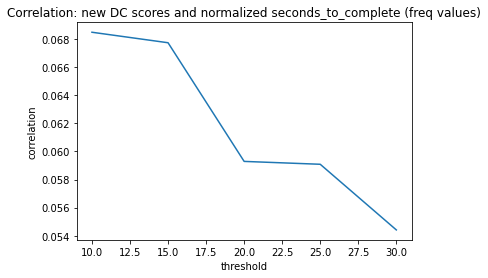

In [49]:
# plot the results 
thresholds = []
correlations = []

for threshold in coorelation_results_N_frequent:
    score, p = coorelation_results_N_frequent[threshold]
    if p < 0.05:
        thresholds.append(threshold)
        correlations.append(score)

plt.plot(thresholds, correlations)
plt.xlabel('threshold')
plt.ylabel('correlation')
plt.title('Correlation: new DC scores and normalized seconds_to_complete (freq values)')

In [50]:
# tf-idf values
coorelation_results_N_frequent = dict()  # where we'll store results

for N in [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]:
    print(N)
    
    coorelation_results_N_frequent[N] = get_correlation_from_beginning(N, step_id_tf_idfs, 
                                                                       step_id_topic_id_mapping, 
                                                                       topic_id_step_id_mapping, 
                                                                       dict_w_topic_prerequisites, 
                                                                       topics_df, tfidf=True)
    
print(coorelation_results_N_frequent)

10
vocabulary
text with step id 19087 is not in the initial table with texts, it must be new
text with step id 19087 is not in the initial table with texts, it must be new
text with step id 19086 is not in the initial table with texts, it must be new
text with step id 19087 is not in the initial table with texts, it must be new
text with step id 16324 is not in the initial table with texts, it must be new
text with step id 19087 is not in the initial table with texts, it must be new
text with step id 19087 is not in the initial table with texts, it must be new
scores
correlation
15
vocabulary
text with step id 19087 is not in the initial table with texts, it must be new
text with step id 19087 is not in the initial table with texts, it must be new
text with step id 19086 is not in the initial table with texts, it must be new
text with step id 19087 is not in the initial table with texts, it must be new
text with step id 16324 is not in the initial table with texts, it must be new
text 

Text(0.5, 1.0, 'Correlation: new DC scores and normalized seconds_to_complete (tf-idf values)')

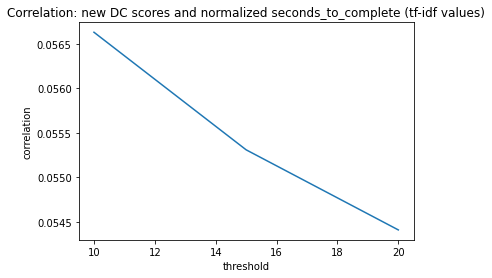

In [51]:
# plot the results 
thresholds = []
correlations = []

for threshold in coorelation_results_N_frequent:
    score, p = coorelation_results_N_frequent[threshold]
    if p < 0.05:
        thresholds.append(threshold)
        correlations.append(score)

plt.plot(thresholds, correlations)
plt.xlabel('threshold')
plt.ylabel('correlation')
plt.title('Correlation: new DC scores and normalized seconds_to_complete (tf-idf values)')

#### See the correlation of the 'best' scores with the number of prereqs

In [52]:
best_threshold = 30

In [54]:
cor_score, p_val, DC_scores = get_correlation_from_beginning(best_threshold, step_id_freq_lists, 
                                                             step_id_topic_id_mapping, 
                                                             topic_id_step_id_mapping,
                                                             dict_w_topic_prerequisites, 
                                                             topics_df, tfidf=False, return_DC_scores=True)

vocabulary
text with step id 19087 is not in the initial table with texts, it must be new
text with step id 19087 is not in the initial table with texts, it must be new
text with step id 19086 is not in the initial table with texts, it must be new
text with step id 19087 is not in the initial table with texts, it must be new
text with step id 16324 is not in the initial table with texts, it must be new
text with step id 19087 is not in the initial table with texts, it must be new
text with step id 19087 is not in the initial table with texts, it must be new
scores
correlation


In [55]:
cor_score, p_val

(0.05441295902846519, 0.04826682427225333)

In [56]:
prereq_numbers = []

for i, row in topics_df.iterrows():
    step_id = row.step_id
    topic_id = step_id_topic_id_mapping[step_id]
    all_prereqs = dict_w_topic_prerequisites[topic_id]
    prereq_numbers.append(len(all_prereqs))

In [57]:
correlate_two(DC_scores, prereq_numbers)

(0.009258657249396172, 0.7370088233920568)